
#### import libraries


In [114]:
import torch #import torch library
import torch.nn as nn #import torch neural network library
import torch.nn.functional as F #import functional neural network module
import torch.optim as optim #import optimizer neural network module
from torch.autograd import Variable #import variable that connect to automatic differentiation
from torchvision import datasets, transforms #import torchvision for datasets and transform
import torchvision
import torchvision.transforms as transforms

### variables

In [115]:
epochs = 10
batch_size = 100
learning_rate=0.01


#### DNN function


In [116]:
class DNN(nn.Module):
  def __init__(self):
    super(DNN, self).__init__() #load super class for training data
    self.fc1 = nn.Linear(784, 600)
    self.fc2 = nn.Linear(600, 450)
    self.fc3 = nn.Linear(450, 200)
    self.fc4 = nn.Linear(200, 100)
    self.fc5 = nn.Linear(100, 50)
    self.fc6 = nn.Linear(50, 20)
    self.fc7 = nn.Linear(20, 10)
    self.relu = nn.ReLU()
	
  def forward(self, x): #feed forward
    layer1 = x.view(-1, 784) #make it flat from 0 - 320
    layer2 = self.relu(self.fc1(layer1)) #layer2 = layer1 -> fc1 -> relu
    layer3 = self.relu(self.fc2(layer2)) #layer3 = layer2 -> fc2 -> relu
    layer4 = self.relu(self.fc3(layer3)) #layer4 = layer3 -> fc3 -> relu
    layer5 = self.relu(self.fc3(layer3)) #layer5 = layer4 -> fc5 -> relu
    layer6 = self.relu(self.fc3(layer3)) #layer6 = layer5 -> fc6 -> relu
    layer7 = self.relu(self.fc3(layer3)) #layer7 = layer6 -> fc7 -> relu

    return F.log_softmax(layer7, -1) #softmax activation to layer4

#### load MNIST dataset

In [117]:
class Dataset:
  def read(self):
   learning_rate = 0.001 
   train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
   validation_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
   train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
   validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=batch_size,shuffle=False)
   return train_loader, validation_loader

In [118]:
train_loader,validation_loader = Dataset().read()
print(len(train_loader))
print(len(validation_loader))

600
100


#### create model and choose optimizer

In [119]:
model = DNN()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### train

In [120]:

for epoch in range(epochs): # train epoch = 10
		model.train() #training
		for batch_idx, (data, label) in enumerate(train_loader): #enumerate train_loader per batch-> index, (data, label) ex: 0, (img1, 4)... 1, (img2, 2)
			data, label = Variable(data), Variable(label) #create torch variable and enter each data and label into it
			optimizer.zero_grad()
			output = model(data) #enter data into model, save in output
			train_loss = F.nll_loss(output, label) #nll = negative log likehood loss between output and label. it useful for classification problem with n class
			train_loss.backward() #compute gradient
			optimizer.step() #update weight
			if batch_idx % 10 == 0: #display step
				print('Train Epochs: {}, Loss: {:.6f} '.format(epoch, train_loss.data )) #print
		model.eval() #evaluation
		test_loss = 0
		correct = 0
    #evaluation
		for data, label in validation_loader: #separate data and label
			data, label = Variable(data,volatile=True), Variable(label) #create torch variable and enter data and label into it
			output = model(data) #enter data into model, save in output
			test_loss += F.nll_loss(output, label, size_average=False).data #
			pred = output.data.max(1, keepdim=True)[1] #prediction result
			correct += pred.eq(label.data.view_as(pred)).cpu().sum() #if label=pred then correct++
		test_loss /= len(validation_loader.dataset) #compute test loss
		print('\nAverage Loss: {:.4f}, Accuracy: {:.0f}'.format(test_loss,  100. * correct / len(validation_loader.dataset)))

Train Epochs: 0, Loss: 5.297371 
Train Epochs: 0, Loss: 2.494075 
Train Epochs: 0, Loss: 1.912421 
Train Epochs: 0, Loss: 1.817142 
Train Epochs: 0, Loss: 1.792770 
Train Epochs: 0, Loss: 1.630574 
Train Epochs: 0, Loss: 1.479974 
Train Epochs: 0, Loss: 1.435507 
Train Epochs: 0, Loss: 1.440165 
Train Epochs: 0, Loss: 1.928349 
Train Epochs: 0, Loss: 1.330401 
Train Epochs: 0, Loss: 1.484985 
Train Epochs: 0, Loss: 1.038338 
Train Epochs: 0, Loss: 1.452853 
Train Epochs: 0, Loss: 1.039150 
Train Epochs: 0, Loss: 1.441702 
Train Epochs: 0, Loss: 1.737313 
Train Epochs: 0, Loss: 0.972874 
Train Epochs: 0, Loss: 0.738411 
Train Epochs: 0, Loss: 0.267157 
Train Epochs: 0, Loss: 0.267436 
Train Epochs: 0, Loss: 0.384720 
Train Epochs: 0, Loss: 0.141786 
Train Epochs: 0, Loss: 0.128303 
Train Epochs: 0, Loss: 0.240540 
Train Epochs: 0, Loss: 0.222658 
Train Epochs: 0, Loss: 0.436790 
Train Epochs: 0, Loss: 0.253476 
Train Epochs: 0, Loss: 0.202689 
Train Epochs: 0, Loss: 0.202489 
Train Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Loss: 0.1613, Accuracy: 95
Train Epochs: 1, Loss: 0.139795 
Train Epochs: 1, Loss: 0.281211 
Train Epochs: 1, Loss: 0.097513 
Train Epochs: 1, Loss: 0.120148 
Train Epochs: 1, Loss: 0.082996 
Train Epochs: 1, Loss: 0.289305 
Train Epochs: 1, Loss: 0.219148 
Train Epochs: 1, Loss: 0.274213 
Train Epochs: 1, Loss: 0.100824 
Train Epochs: 1, Loss: 0.070135 
Train Epochs: 1, Loss: 0.144091 
Train Epochs: 1, Loss: 0.211357 
Train Epochs: 1, Loss: 0.047043 
Train Epochs: 1, Loss: 0.203002 
Train Epochs: 1, Loss: 0.176305 
Train Epochs: 1, Loss: 0.226544 
Train Epochs: 1, Loss: 0.316829 
Train Epochs: 1, Loss: 0.051196 
Train Epochs: 1, Loss: 0.103002 
Train Epochs: 1, Loss: 0.208443 
Train Epochs: 1, Loss: 0.123128 
Train Epochs: 1, Loss: 0.122795 
Train Epochs: 1, Loss: 0.079565 
Train Epochs: 1, Loss: 0.241435 
Train Epochs: 1, Loss: 0.140227 
Train Epochs: 1, Loss: 0.165299 
Train Epochs: 1, Loss: 0.203843 
Train Epochs: 1, Loss: 0.332744 
Train Epochs: 1, Loss: 0.127916 
Train E

#### predict

Predicted Digit = 7


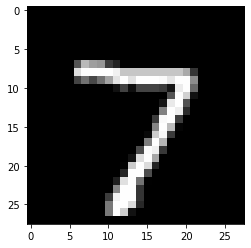

In [121]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(validation_loader))# load an image from validation_loader
img = images[0].view(1, 784) 
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
img = np.array(img, dtype='float')
pixels = img.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()